In [1]:
import numpy as np
import seaborn as sns
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

In [2]:
# force the math text to look normal
mpl.rcParams['mathtext.default'] = 'regular'

def major_ticks(x, pos=None):
    """Set the major ticks according 
    to this custom style
    """
    x = mdates.num2date(x)
    if pos == 0:
        fmt = "%-d\n%b %Y\n%I %p"
    else:
        fmt = "%-d"
    return x.strftime(fmt)

# set the default seaborn params
sns.set("paper", "ticks", color_codes=True, palette='colorblind')


In [3]:
#load in the comp data
comp = pd.read_csv('4_factor_MOD-00397/res.csv')
comp.rename(columns={'Unnamed: 0':'species'},inplace=True)
comp
#comp.T.plot(kind='bar')

,species,Factor 1,Factor 2,Factor 3,Factor 4,Residual
0,bin0,0.533165,0.000000,0.033055,0.440029,-0.006248
1,bin1,0.886017,0.000000,0.000000,0.011336,0.102646
2,bin2,0.909057,0.000000,0.000000,0.000000,0.090943
3,bin3,0.934368,0.000000,0.000000,0.000000,0.065632
4,bin4,0.955624,0.000000,0.000000,0.000000,0.044376
5,bin5,0.989514,0.000000,0.000000,0.000000,0.010486
6,co_diff,0.000854,0.462174,0.214016,0.322455,0.000501
7,no_diff,0.000000,0.293387,0.000000,0.627397,0.079216
8,no2_diff,0.000000,0.377324,0.145946,0.253253,0.223476
9,ox_diff,0.000000,0.254411,0.000000,0.554299,0.191289


In [4]:
comp2 = pd.melt(comp,id_vars='species', value_vars=['Factor 1','Factor 2','Factor 3','Factor 4','Residual'])
comp2

,species,variable,value
0,bin0,Factor 1,0.533165
1,bin1,Factor 1,0.886017
2,bin2,Factor 1,0.909057
3,bin3,Factor 1,0.934368
4,bin4,Factor 1,0.955624
5,bin5,Factor 1,0.989514
6,co_diff,Factor 1,0.000854
7,no_diff,Factor 1,0.000000
8,no2_diff,Factor 1,0.000000
9,ox_diff,Factor 1,0.000000


In [5]:
#load in timeseries data
ts = pd.read_csv('4_factor_MOD-00397/timeseries.csv')
results = pd.read_csv('4_factor_MOD-00397/results.csv')
results['localtime'] = ts['localtime']

ts = pd.concat([ts,results['Factor 1'],results['Factor 2'], results['Factor 3'],results['Factor 4']],axis=1)
ts

,Unnamed: 0,localtime,bin0,bin1,bin2,bin3,bin4,bin5,co_diff,no_diff,no2_diff,ox_diff,Factor 1,Factor 2,Factor 3,Factor 4
0,0,2024-10-01 23:59:32,7.722,0.240,0.070,0.008,0.013,0.017,77.2,4.8,1.1,1.0,0.000000,42.102276,0.0,7.015013
1,1,2024-10-01 23:58:32,6.953,0.220,0.049,0.007,0.024,0.007,77.2,4.7,1.3,1.1,0.000000,43.195067,0.0,6.526662
2,2,2024-10-01 23:57:32,6.780,0.221,0.060,0.007,0.029,0.021,72.1,4.9,1.3,1.2,0.000000,39.809132,0.0,6.335638
3,3,2024-10-01 23:56:32,9.128,0.298,0.063,0.021,0.029,0.005,72.7,4.8,1.2,0.9,0.000000,36.947716,0.0,7.811896
4,4,2024-10-01 23:55:32,7.449,0.192,0.051,0.017,0.015,0.016,70.7,4.7,1.1,0.9,0.000000,37.940385,0.0,6.699669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248414,494252,2023-08-16 17:54:28,130.378,16.450,5.366,1.387,1.242,0.337,224.2,36.4,0.4,0.2,1.292004,70.502277,0.0,43.909288
248415,494253,2023-08-16 17:53:28,136.256,16.360,5.077,1.168,1.079,0.358,224.6,36.6,0.7,0.1,1.370141,68.366863,0.0,44.978688
248416,494254,2023-08-16 17:52:28,120.234,14.457,4.634,0.939,0.934,0.321,223.7,36.6,0.1,0.1,1.142898,73.618135,0.0,42.428609
248417,494255,2023-08-16 17:51:28,119.332,13.699,4.225,1.098,0.844,0.354,221.4,36.7,0.4,0.1,1.125752,71.972127,0.0,42.401817


In [6]:
ts['localtime'] = pd.to_datetime(ts['localtime']) #convert timestamp column to pandas timestamp format
ts = ts.set_index('localtime',append=False) #setindex as local time
ts
#start = '2022-06-09 23:00'
#fin = '2022-06-12 00:00'
#ts = ts.resample('D').mean()
#ts

,Unnamed: 0,bin0,bin1,bin2,bin3,bin4,bin5,co_diff,no_diff,no2_diff,ox_diff,Factor 1,Factor 2,Factor 3,Factor 4
localtime,,,,,,,,,,,,,,,
2024-10-01 23:59:32,0,7.722,0.240,0.070,0.008,0.013,0.017,77.2,4.8,1.1,1.0,0.000000,42.102276,0.0,7.015013
2024-10-01 23:58:32,1,6.953,0.220,0.049,0.007,0.024,0.007,77.2,4.7,1.3,1.1,0.000000,43.195067,0.0,6.526662
2024-10-01 23:57:32,2,6.780,0.221,0.060,0.007,0.029,0.021,72.1,4.9,1.3,1.2,0.000000,39.809132,0.0,6.335638
2024-10-01 23:56:32,3,9.128,0.298,0.063,0.021,0.029,0.005,72.7,4.8,1.2,0.9,0.000000,36.947716,0.0,7.811896
2024-10-01 23:55:32,4,7.449,0.192,0.051,0.017,0.015,0.016,70.7,4.7,1.1,0.9,0.000000,37.940385,0.0,6.699669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-16 17:54:28,494252,130.378,16.450,5.366,1.387,1.242,0.337,224.2,36.4,0.4,0.2,1.292004,70.502277,0.0,43.909288
2023-08-16 17:53:28,494253,136.256,16.360,5.077,1.168,1.079,0.358,224.6,36.6,0.7,0.1,1.370141,68.366863,0.0,44.978688
2023-08-16 17:52:28,494254,120.234,14.457,4.634,0.939,0.934,0.321,223.7,36.6,0.1,0.1,1.142898,73.618135,0.0,42.428609


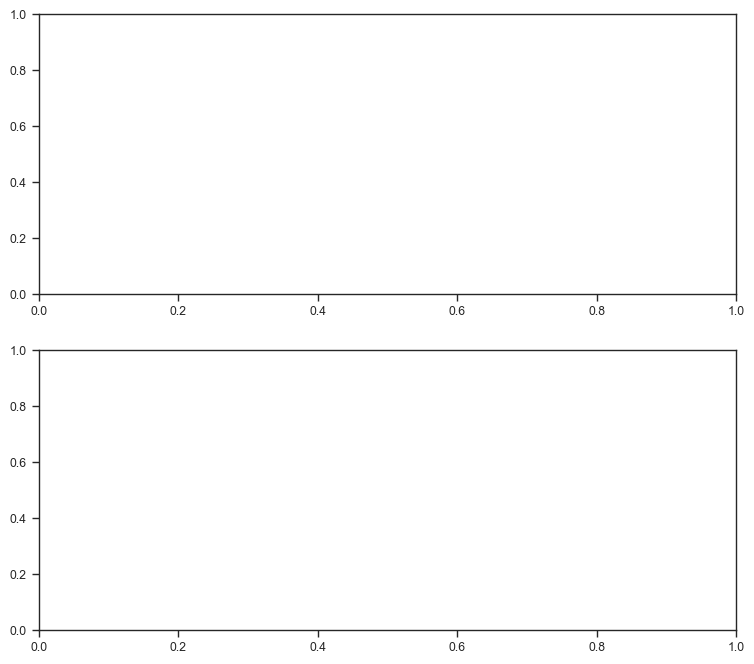

In [7]:
# set up the figure
fig = plt.figure(figsize=(9, 8))

    # build a gridspec-based layout
#gs = fig.add_gridspec(1, 5)

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)



In [8]:
# Plot the timeseries

cols_to_plot = [col for col in ts.columns if "Factor" in col]
cols_to_plot


['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4']

In [9]:
#ax2.plot(ts[cols_to_plot[0]], lw=1, color=sns.xkcd_rgb['greyish'])
#ax2.plot(ts[cols_to_plot[1]], lw=1, color=sns.xkcd_rgb['faded green'])
#ax2.plot(ts[cols_to_plot[2]], lw=1, color=sns.xkcd_rgb['dusty purple'])
#ax2.plot(ts[cols_to_plot[3]], lw=1, color=sns.xkcd_rgb['red'])

In [10]:
   # remove ticks on y axis
#ax2.set_ylim(0, 3)
#ax2.set_xlim(ts.index[0], ts.index[-1])
#ax2.set_ylabel("Factor Intensity (a.u.)",fontsize=14)
#ax2.legend([
##        "Factor 1 ",
 #       "Factor 2 ",
 #       "Factor 3 ",
 #       "Factor 4"
 #       ], loc="upper right")

#sns.despine()


In [11]:
cols = ['bin0', 'bin1', 'bin2','bin3','bin4','bin5','co_diff', 'ox_diff', 'no_diff', 'no2_diff']

pal = sns.color_palette()

colors = [pal[3], pal[2], pal[4], pal[5]]
colors += sns.color_palette("Blues", 6)
colors.reverse()
#colors

In [12]:
ax1 = sns.barplot(x='variable',y='value',
        data=comp2,
        ax=ax1, hue='species',hue_order=cols,
        palette=colors, saturation=1, edgecolor='black', linewidth=0.25,
        errwidth=.75)


In [13]:
ax1.set_ylim(0, 1)
ax1.set_xlabel("")
ax1.set_ylabel("Percent of Species Signal\nDescribed by Factor", fontsize=14)
ax1.set(yticks=np.linspace(0, 1, 11), yticklabels=["0","","","","","50","","","","","100"])
ax1.tick_params(axis='both', which='major', labelsize=14)


In [14]:
handles, _ = ax1.get_legend_handles_labels()
labels = ["Bin 0", "Bin 1", "Bin 2", "Bin 3","Bin 4","Bin 5","CO", "$O_3$", "$NO$", "$NO_2$",]
ax1.legend(handles, labels)


In [15]:
def diurnal(data, **kwargs):
    """
    """
    cpy = data.copy()
    cpy["_time"] = cpy.index.map(lambda dt: dt.strftime("%H:%M"))
    
    stats = cpy.groupby("_time").describe()
    stats.index = stats.index.map(pd.to_datetime)
    
    # get the column names
    cols = stats.columns.get_level_values(0).unique().values
    
    with sns.axes_style(kwargs.pop('style', 'white')):
        fig, ax = plt.subplots(1, figsize=kwargs.pop('figsize', (10, 6)))
        
        for c in cols:
            ax.plot(stats.index, stats[c]['mean'], label=c, lw=5)
        
        ticks = ax.get_xticks()
        ax.set_xticks(np.linspace(date2num(stats.index[0]), date2num(stats.index[0] + timedelta(hours=24)), 5))
        ax.set_xticks(np.linspace(date2num(stats.index[0]), date2num(stats.index[0] + timedelta(hours=24)), 25), minor=True)

        ax.xaxis.set_major_formatter(mdates.DateFormatter('%I:%M %p'))

        ax.set_xlim(stats.index[0], stats.index[-1])
        ax.set(yticks=[0, 0.5, 1, 1.5, 2, 2.5], yticklabels=["0", "", "1", "", "2", ""])
        ax.set_ylabel("Factor Signal", fontsize=28)
        ax.legend(loc='upper left')

        ax.grid(None, axis='x')

        ax.set_ylim(0, 2.5)
    
    return ax

In [16]:
cpy = ts[["Factor 1", "Factor 2", "Factor 3", "Factor 4"]].resample('5min').mean().dropna(how='any')

cpy["_ts"] = cpy.index.map(lambda dt: dt.strftime("%H:%M"))

stats = cpy.groupby("_ts").describe()
stats.index = stats.index.map(pd.to_datetime)

In [17]:
ax1.set_title('(a)',fontsize=14)
ax2.set_title('(b)',fontsize=14)

#ax2.tick_params(axis='both', which='major', labelsize=14)


Text(0.5, 1.0, '(b)')

In [18]:

ax2.plot(stats.index, stats["Factor 1"]["mean"], label="Factor 1 ", lw=4, color=sns.xkcd_rgb['greyish'])
ax2.plot(stats.index, stats["Factor 2"]["mean"], label="Factor 2", lw=4, color=sns.xkcd_rgb['faded green'])
ax2.plot(stats.index, stats["Factor 3"]["mean"], label="Factor 3", lw=4, color=sns.xkcd_rgb['dusty purple'])
ax2.plot(stats.index, stats["Factor 4"]["mean"], label="Factor 4", lw=4, color=sns.xkcd_rgb['red'])


ticks = ax2.get_xticks()

ax2.xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 6, 12, 18, 24]))
ax2.xaxis.set_minor_locator(mdates.HourLocator(interval=1))

ax2.xaxis.set_major_formatter(mdates.DateFormatter("%I:%M %p"))
ax2.set_xlim(ticks[0], ticks[-1])
ax2.set_ylim(1, 1000)
ax2.set_yscale('log')
ax2.set_ylabel("Factor Intensity (a.u.)", fontsize=18)

ax2.legend(loc='upper left',fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)


In [19]:
   # make the plots a bit shorter to make room for the figure sub-labels
#plt.subplots_adjust(top=.5)

    # add some figure text
plt.gcf().text(0.09, 0.9, "(a)", fontsize=12)
plt.gcf().text(0.5, 0.9, "(b)", fontsize=12)
plt.gcf().text(0.09,0.9,'MOD-00397',fontsize=12)

plt.tight_layout()


fig.savefig('time_barchart_MOD-00397_4_factor.png', dpi=350)

<Figure size 640x480 with 0 Axes>